In [82]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from torchvision import models
from visualization.modules import LayeredModule
from visualization.data import *
from visualization.image_proc import *
from visualization.generate import NetDreamer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
IMAGE_PATH = '../../images/examples/'

### CNN Layer Visualization

In [84]:
original_model = models.vgg16(pretrained=True)

In [85]:
original_model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [86]:
ns = NetSeer(original_model)

In [87]:
ri, pi = ns.generate_filter_visualization('features-conv-7', 5)

Iteration: 1, Loss: 1.3845
Iteration: 2, Loss: -1.6591
Iteration: 3, Loss: -8.4391
Iteration: 4, Loss: -15.5666
Iteration: 5, Loss: -22.4517
Iteration: 6, Loss: -28.8847
Iteration: 7, Loss: -34.8918
Iteration: 8, Loss: -40.6689
Iteration: 9, Loss: -46.2855
Iteration: 10, Loss: -51.7297
Iteration: 11, Loss: -57.0456
Iteration: 12, Loss: -62.3010
Iteration: 13, Loss: -67.4804
Iteration: 14, Loss: -72.5956
Iteration: 15, Loss: -77.6633
Iteration: 16, Loss: -82.6834
Iteration: 17, Loss: -87.6391
Iteration: 18, Loss: -92.5802
Iteration: 19, Loss: -97.5452
Iteration: 20, Loss: -102.5205
Iteration: 21, Loss: -107.4430
Iteration: 22, Loss: -112.3540
Iteration: 23, Loss: -117.2930
Iteration: 24, Loss: -122.2693
Iteration: 25, Loss: -127.2401
Iteration: 26, Loss: -132.2413
Iteration: 27, Loss: -137.2704
Iteration: 28, Loss: -142.3266
Iteration: 29, Loss: -147.3951
Iteration: 30, Loss: -152.4900


In [88]:
pi.shape

torch.Size([1, 3, 224, 224])

In [89]:
type(ri)

numpy.ndarray

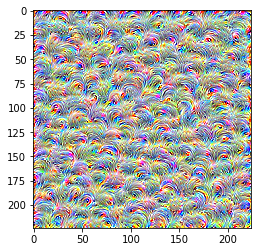

In [90]:
plt.imshow(ri)

### Generate class example

In [72]:
target_class = 130  # Flamingo
pretrained_model = models.alexnet(pretrained=True)
ns = NetSeer(pretrained_model)
pimg, rimg = ns.generate_class_sample(target_class)

Iteration: 1, Loss: -0.8889
Iteration: 2, Loss: -2.1472
Iteration: 3, Loss: -3.6658
Iteration: 4, Loss: -5.2762
Iteration: 5, Loss: -6.9496
Iteration: 6, Loss: -8.8910
Iteration: 7, Loss: -11.2894
Iteration: 8, Loss: -14.7127
Iteration: 9, Loss: -20.0055
Iteration: 10, Loss: -27.9398
Iteration: 11, Loss: -38.0853
Iteration: 12, Loss: -51.2163
Iteration: 13, Loss: -68.5932
Iteration: 14, Loss: -91.5581
Iteration: 15, Loss: -120.0908
Iteration: 16, Loss: -155.7867
Iteration: 17, Loss: -197.8915
Iteration: 18, Loss: -251.2899
Iteration: 19, Loss: -317.7095
Iteration: 20, Loss: -401.1628
Iteration: 21, Loss: -495.3202
Iteration: 22, Loss: -605.0782
Iteration: 23, Loss: -729.9229
Iteration: 24, Loss: -870.5936
Iteration: 25, Loss: -1031.9388
Iteration: 26, Loss: -1211.4487
Iteration: 27, Loss: -1412.9641
Iteration: 28, Loss: -1634.3701
Iteration: 29, Loss: -1878.5327
Iteration: 30, Loss: -2148.5269
Iteration: 31, Loss: -2439.9539
Iteration: 32, Loss: -2761.2620
Iteration: 33, Loss: -3107.04

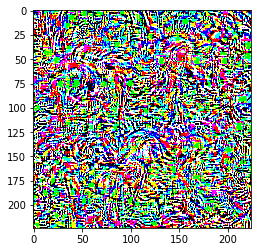

In [73]:
plt.imshow(pimg)

### Deep Dream

In [76]:
pretrained_model = models.vgg19(pretrained=True).features
ns = NetSeer(pretrained_model)

In [77]:
pretrained_model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [79]:
ns.original_model

LayeredModule(
  (layers): ModuleDict(
    (conv-0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu-0): ReLU()
    (conv-1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu-1): ReLU()
    (pool-0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv-2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu-2): ReLU()
    (conv-3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu-3): ReLU()
    (pool-1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv-4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu-4): ReLU()
    (conv-5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu-5): ReLU()
    (conv-6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu-6): ReLU()
    (conv-7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), pa

Iteration: 1, Loss: 1.4128
Iteration: 2, Loss: -0.5721
Iteration: 3, Loss: -2.2463
Iteration: 4, Loss: -4.6928
Iteration: 5, Loss: -7.0445
Iteration: 6, Loss: -10.4475
Iteration: 7, Loss: -12.6015
Iteration: 8, Loss: -15.3381
Iteration: 9, Loss: -19.6783
Iteration: 10, Loss: -23.3625
Iteration: 11, Loss: -26.8439
Iteration: 12, Loss: -31.8245
Iteration: 13, Loss: -37.2770
Iteration: 14, Loss: -42.5988
Iteration: 15, Loss: -45.6744
Iteration: 16, Loss: -52.6659
Iteration: 17, Loss: -57.4507
Iteration: 18, Loss: -63.5678
Iteration: 19, Loss: -68.1411
Iteration: 20, Loss: -74.9204


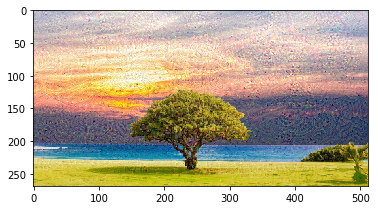

In [92]:
cnn_layer = 'conv-15'
filter_pos = 94

img = PIL.Image.open(IMAGE_PATH + 'dd_tree.jpg').convert('RGB')

# Fully connected layer is not needed
pretrained_model = models.vgg19(pretrained=True).features
ns = NetDreamer(pretrained_model)
dd, _ = ns.deep_dream(img, cnn_layer, filter_pos, 20)

plt.imshow(dd)

## Generate inverted image

In [93]:
original_img, name, target_class = get_example_data(0, img_path=IMAGE_PATH)

In [94]:
original_model = models.alexnet(pretrained=True)

In [95]:
original_model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [96]:
ns = NetDreamer(original_model)

In [97]:
ns.original_model

LayeredModule(
  (layers): ModuleDict(
    (features-conv-0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (features-relu-0): ReLU()
    (features-pool-0): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (features-conv-1): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (features-relu-1): ReLU()
    (features-pool-1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (features-conv-2): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (features-relu-2): ReLU()
    (features-conv-3): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (features-relu-3): ReLU()
    (features-conv-4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (features-relu-4): ReLU()
    (features-pool-2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (avgpool-0): AdaptiveAvgPool2d(output_size=(6, 6))
    (clas

In [102]:
ii, _ = ns.generate_inverted_image(original_img, 224, 'features-conv-1')

Iteration: 0, Loss: 0.0944
Iteration: 5, Loss: 0.0755
Iteration: 10, Loss: 0.0550
Iteration: 15, Loss: 0.0355
Iteration: 20, Loss: 0.0238
Iteration: 25, Loss: 0.0194
Iteration: 30, Loss: 0.0171
Iteration: 35, Loss: 0.0146
Iteration: 40, Loss: 0.0122
Iteration: 45, Loss: 0.0116
Iteration: 50, Loss: 0.0115
Iteration: 55, Loss: 0.0113
Iteration: 60, Loss: 0.0111
Iteration: 65, Loss: 0.0110
Iteration: 70, Loss: 0.0108
Iteration: 75, Loss: 0.0107
Iteration: 80, Loss: 0.0106
Iteration: 85, Loss: 0.0105
Iteration: 90, Loss: 0.0105
Iteration: 95, Loss: 0.0105
Iteration: 100, Loss: 0.0105
Iteration: 105, Loss: 0.0105
Iteration: 110, Loss: 0.0105
Iteration: 115, Loss: 0.0105
Iteration: 120, Loss: 0.0105
Iteration: 125, Loss: 0.0104
Iteration: 130, Loss: 0.0104
Iteration: 135, Loss: 0.0104
Iteration: 140, Loss: 0.0104
Iteration: 145, Loss: 0.0104
Iteration: 150, Loss: 0.0104
Iteration: 155, Loss: 0.0104
Iteration: 160, Loss: 0.0104
Iteration: 165, Loss: 0.0104
Iteration: 170, Loss: 0.0104
Iterati

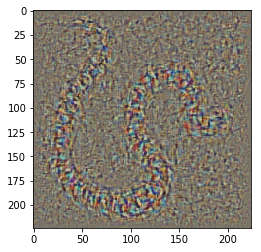

In [99]:
plt.imshow(ii)